In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import json

In [2]:
# Study data files
estimated_crimes_path = "estimated_crimes.csv"

# Read the  data and the study results
estimated_crimes = pd.read_csv(estimated_crimes_path)

estimated_crimes

,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,1995,NaN,262803276,1798792,21606,97470,NaN,580509,1099207,12063935,2593784,7997710,1472441,NaN
1,1996,NaN,265228572,1688540,19645,96252,NaN,535594,1037049,11805323,2506400,7904685,1394238,NaN
2,1997,NaN,267783607,1636099,18211,96153,NaN,498534,1023201,11558975,2461026,7743760,1354189,NaN
3,1998,NaN,270248003,1533887,16974,93144,NaN,447186,976583,10951827,2332735,7376311,1242781,NaN
4,1999,NaN,272690813,1426044,15522,89411,NaN,409371,911740,10208334,2100739,6955520,1152075,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1139,2012,WY,576626,1161,14,154,NaN,61,932,13222,2125,10513,584,NaN
1140,2013,WY,583223,1212,17,144,NaN,74,917,12809,1956,10275,578,NaN
1141,2014,WY,584304,1142,16,127,204.0,53,899,11477,1689,9185,603,NaN
1142,2015,WY,586555,1300,16,171,124.0,59,1054,11151,1762,8797,592,NaN


In [3]:
#Choose the years that are being used
estimated_crimes_2006 = estimated_crimes[estimated_crimes['year'] >= int('2006')]
estimated_crimes_2006_09 = estimated_crimes_2006[estimated_crimes['year'] <= int('2009')]


C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
#Choose the years that are being used
estimated_crimes_2006 = estimated_crimes[estimated_crimes['year'] >= int('2006')]
estimated_crimes_2006_09 = estimated_crimes_2006[estimated_crimes['year'] <= int('2009')]
#Start a new index and drop the old one
estimated_crimes_2006_09.reset_index(inplace = True)
estimated_crimes_2006_09.drop(columns = ['index'], inplace = True)
estimated_crimes_2006_09

C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Kevin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,state_abbr,population,violent_crime,homicide,rape_legacy,rape_revised,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,caveats
0,2006,NaN,299398484,1435123,17309,94472,NaN,449246,874096,10019601,2194993,6626363,1198245,NaN
1,2007,NaN,301621157,1422970,17128,92160,NaN,447324,866358,9882212,2190198,6591542,1100472,NaN
2,2008,NaN,304059724,1394461,16465,90750,NaN,443563,843683,9774152,2228887,6586206,959059,NaN
3,2009,NaN,307006550,1325896,15399,89241,NaN,408742,812514,9337060,2203313,6338095,795652,NaN
4,2006,AL,4599030,19553,382,1646,NaN,7062,10463,181249,44780,121451,15018,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,2009,WI,5654774,14650,146,1118,NaN,4904,8482,147692,26813,111947,8932,NaN
204,2006,WY,515004,1307,13,151,NaN,72,1071,15381,2322,12255,804,NaN
205,2007,WY,522830,1344,21,172,NaN,84,1067,15053,2365,11875,813,NaN
206,2008,WY,532668,1330,12,185,NaN,87,1046,14515,2198,11584,733,NaN


In [5]:
#Drop two columns with mostly NaN values
estimated_crimes_2006_09.drop(['rape_revised','caveats'],axis=1,inplace=True)
estimated_crimes_2006_09 = estimated_crimes_2006_09.iloc[5:]

#Start a new index and drop the old one
estimated_crimes_2006_09.reset_index(inplace = True)
estimated_crimes_2006_09.drop(columns = ['index'], inplace = True)
estimated_crimes_2006_09

C:\Users\Kevin\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft
0,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238
1,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466
2,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091
3,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536
4,2007,AK,683478,4520,43,545,581,3351,23096,3734,16929,2433
...,...,...,...,...,...,...,...,...,...,...,...,...
198,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932
199,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804
200,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813
201,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733


In [6]:
#
estimated_crimes_2006_09["Total Crimes"]= estimated_crimes_2006_09["violent_crime"]+estimated_crimes_2006_09["homicide"]+estimated_crimes_2006_09["rape_legacy"]+estimated_crimes_2006_09["robbery"]+estimated_crimes_2006_09['aggravated_assault']+estimated_crimes_2006_09["property_crime"]+estimated_crimes_2006_09["burglary"]+estimated_crimes_2006_09["larceny"]+estimated_crimes_2006_09["motor_vehicle_theft"]
estimated_crimes_2006_09['Crime Rate'] = (estimated_crimes_2006_09["Total Crimes"]/estimated_crimes_2006_09['population'])*100
estimated_crimes_2006_09

C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Kevin\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total Crimes,Crime Rate
0,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238,409714,8.853224
1,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466,423052,9.074669
2,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091,398402,8.460962
3,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536,57170,8.532161
4,2007,AK,683478,4520,43,545,581,3351,23096,3734,16929,2433,55232,8.081021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932,324684,5.741768
199,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804,33376,6.480726
200,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813,32794,6.272402
201,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733,31690,5.949297


In [7]:
#divide crime rate DF by year
crimerate2006 = estimated_crimes_2006_09.loc[estimated_crimes_2006_09['year'] == 2006]
crimerate2007 = estimated_crimes_2006_09.loc[estimated_crimes_2006_09['year'] == 2007]
crimerate2008 = estimated_crimes_2006_09.loc[estimated_crimes_2006_09['year'] == 2008]
crimerate2009 = estimated_crimes_2006_09.loc[estimated_crimes_2006_09['year'] == 2009]


In [8]:
# Study data files
US_gradrate_path = "GradRates.csv"

# Read the  data and the study results
US_gradrate = pd.read_csv(US_gradrate_path)
#See the data


In [9]:
state_abbr = {1: 'AL', 2: 'AK', 60: 'AS', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC', 12: 'FL', 13: 'GA',
    66: 'GU', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS', 21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA',
    26: 'MI', 27: 'MN', 28: 'MS', 29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY', 37: 'NC',
    38: 'ND', 69:'MP', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 72: 'PR', 44: 'RI', 45: 'SC', 46: 'SD', 47: 'TN', 48: 'TX',
    49: 'UT', 50: 'VT', 78: 'VI', 51: 'VA', 53: 'WA', 54: 'WV', 55: 'WI', 56: 'WY'
}


In [10]:
#Add a column based on state number to display the abbreviation
US_gradrate['state_abbr'] = US_gradrate['State'].map(state_abbr)
US_gradrate

,Unnamed: 0,Year,State,LEAID,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGEB,AFGR,TOTOHC,state_abbr
0,0,2006-07,1,100002,0,0,-2.0,-1,-1,-1.0,-1,AL
1,1,2006-07,1,100005,30,749,4.0,192,263,73.0,14,AL
2,2,2006-07,1,100006,46,1209,3.8,216,456,47.4,28,AL
3,3,2006-07,1,100007,45,2726,1.7,779,878,88.7,10,AL
4,4,2006-07,1,100008,8,1968,0.4,562,576,97.6,10,AL
...,...,...,...,...,...,...,...,...,...,...,...,...
73124,73124,2009-10,66,6600040,-1,-1,-1.0,-1,-1,-1.0,-1,GU
73125,73125,2009-10,69,6900030,-1,-1,-1.0,-1,-1,-1.0,-1,MP
73126,73126,2009-10,72,7200030,-9,145172,-9.0,25514,41984,60.8,-2,PR
73127,73127,2009-10,78,7800002,144,2591,5.6,463,-2,-2.0,0,VI


In [11]:
#Drop columns that are not relevant for our analysis 
US_gradrate.drop(['LEAID','AFGEB','TOTOHC','State','Unnamed: 0'],axis=1,inplace=True)
US_gradrate

,Year,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
0,2006-07,0,0,-2.0,-1,-1.0,AL
1,2006-07,30,749,4.0,192,73.0,AL
2,2006-07,46,1209,3.8,216,47.4,AL
3,2006-07,45,2726,1.7,779,88.7,AL
4,2006-07,8,1968,0.4,562,97.6,AL
...,...,...,...,...,...,...,...
73124,2009-10,-1,-1,-1.0,-1,-1.0,GU
73125,2009-10,-1,-1,-1.0,-1,-1.0,MP
73126,2009-10,-9,145172,-9.0,25514,60.8,PR
73127,2009-10,144,2591,5.6,463,-2.0,VI


In [12]:
# Get rid of all NaN values that are negative
US_gradrate = US_gradrate.loc[US_gradrate['Droupout Rate'] > 0 ]
US_gradrate = US_gradrate.loc[US_gradrate['Total Dropouts'] > 0 ]
US_gradrate = US_gradrate.loc[US_gradrate['Diploma Count'] > 0 ]
US_gradrate = US_gradrate.loc[US_gradrate['Dropout Enroll base'] > 0 ]
US_gradrate = US_gradrate.loc[US_gradrate['AFGR'] > 0 ]
US_gradrate

,Year,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,state_abbr
1,2006-07,30,749,4.0,192,73.0,AL
2,2006-07,46,1209,3.8,216,47.4,AL
3,2006-07,45,2726,1.7,779,88.7,AL
4,2006-07,8,1968,0.4,562,97.6,AL
7,2006-07,19,317,6.0,70,61.9,AL
...,...,...,...,...,...,...,...
72899,2009-10,13,284,4.6,71,88.8,WY
72900,2009-10,57,969,5.9,217,81.9,WY
72901,2009-10,5,100,5.0,19,82.6,WY
72906,2009-10,19,399,4.8,93,84.5,WY


In [13]:
#Create a DF with average per state for GradRates
US_gradrate_avg =US_gradrate.groupby(US_gradrate["state_abbr"]).mean()
US_gradrate_avg.reset_index(inplace = True)
US_gradrate_avg

,state_abbr,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,AK,88.696970,1133.401515,10.811364,227.507576,66.601515
1,AL,37.781977,1646.200581,2.714535,333.238372,68.828198
2,AR,30.499261,591.481536,5.066470,127.923191,78.065731
3,AZ,84.986616,1193.619503,14.614914,239.028681,72.969598
4,CA,262.277476,3898.164309,10.255386,779.289445,72.538194
5,CO,159.318584,2152.079646,7.463422,446.752212,76.660472
6,CT,38.869258,1345.809187,2.604594,314.544170,81.642403
7,DC,340.000000,4546.100000,4.500000,843.200000,62.130000
8,DE,95.626667,1592.893333,6.084000,338.826667,69.313333
9,FL,409.429952,11300.222222,3.771014,2280.227053,66.304831


In [76]:
#Merging to get rid of extra states that are not included in crime rate
CrimevsGrad = pd.merge(estimated_crimes_2006_09, US_gradrate_avg, on= 'state_abbr', how = 'left')
CrimevsGrad

,year,state_abbr,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,motor_vehicle_theft,Total Crimes,Crime Rate,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR
0,2007,AL,4627851,20775,412,1548,7398,11417,184082,45379,124465,14238,409714,8.853224,37.781977,1646.200581,2.714535,333.238372,68.828198
1,2008,AL,4661900,21110,351,1618,7346,11795,190416,50411,126539,13466,423052,9.074669,37.781977,1646.200581,2.714535,333.238372,68.828198
2,2009,AL,4708708,21194,322,1504,6265,13103,178007,48844,118072,11091,398402,8.460962,37.781977,1646.200581,2.714535,333.238372,68.828198
3,2006,AK,670053,4610,36,512,600,3462,23975,4155,17284,2536,57170,8.532161,88.696970,1133.401515,10.811364,227.507576,66.601515
4,2007,AK,683478,4520,43,545,581,3351,23096,3734,16929,2433,55232,8.081021,88.696970,1133.401515,10.811364,227.507576,66.601515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,2009,WI,5654774,14650,146,1118,4904,8482,147692,26813,111947,8932,324684,5.741768,40.234962,1214.125940,2.203759,291.191729,91.324812
199,2006,WY,515004,1307,13,151,72,1071,15381,2322,12255,804,33376,6.480726,36.701754,739.307018,5.252632,161.780702,78.067544
200,2007,WY,522830,1344,21,172,84,1067,15053,2365,11875,813,32794,6.272402,36.701754,739.307018,5.252632,161.780702,78.067544
201,2008,WY,532668,1330,12,185,87,1046,14515,2198,11584,733,31690,5.949297,36.701754,739.307018,5.252632,161.780702,78.067544


In [77]:
CrimevsGrad["robbery rate"] = (CrimevsGrad["robbery"]/CrimevsGrad['population'])*10000
CrimevsGrad["homicide rate"] = (CrimevsGrad["homicide"]/CrimevsGrad['population'])*10000
CrimevsGrad["motor_vehicle_theft rate"] = (CrimevsGrad["motor_vehicle_theft"]/CrimevsGrad['population'])*10000
CrimevsGrad["rape_legacy rate"] = (CrimevsGrad["rape_legacy"]/CrimevsGrad['population'])*10000

In [78]:
#Mean and Median of Crime Rate
crime_mean = round(CrimevsGrad['Crime Rate'].astype('float').mean(), 2)
crime_median = round(CrimevsGrad['Crime Rate'].astype('float').median(), 2)
print("Crime Mean: "+str(crime_mean))
print("Crime Median: "+str(crime_median))

Crime Mean: 7.17
Crime Median: 7.13


In [79]:
#Mean and Median of Graduation Rate
grad_mean = round(CrimevsGrad['AFGR'].astype('float').mean(), 2)
grad_median = round(CrimevsGrad['AFGR'].astype('float').median(), 2)
print("Graduation Mean: "+str(grad_mean))
print("Graduation Median: "+str(grad_median))

Graduation Mean: 76.6
Graduation Median: 78.07


In [80]:
#Find the Correlation between Crime Rate and Graduation Rate
correlation = CrimevsGrad.corr()
print("Correlation: "+ str(round(correlation["Crime Rate"][-1],2)))

Correlation: 0.21


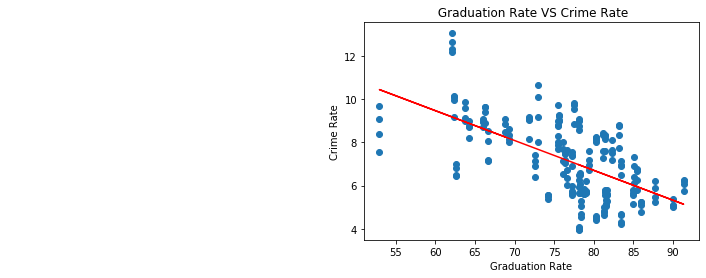

In [81]:
# Creating a Linear Regression between Crime Rates and Grad Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['Crime Rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Crime Rate")
plt.title(" Graduation Rate VS Crime Rate")
plt.show()


In [82]:
CrimevsGrad.corr()

,year,population,violent_crime,homicide,rape_legacy,robbery,aggravated_assault,property_crime,burglary,larceny,...,Crime Rate,Total Dropouts,Dropout Enroll base,Droupout Rate,Diploma Count,AFGR,robbery rate,homicide rate,motor_vehicle_theft rate,rape_legacy rate
year,1.000000,0.007038,-0.023847,-0.034137,-0.020719,-0.023307,-0.023683,-0.021987,0.002949,-0.013947,...,-0.134966,-0.002042,-0.001490,-0.006914,-0.001535,-0.006519,-0.032194,-0.056984,-0.252443,-0.049112
population,0.007038,1.000000,0.967863,0.961353,0.934063,0.981850,0.940057,0.960567,0.924422,0.959244,...,0.090096,-0.052567,-0.048064,0.131741,-0.048590,-0.012215,0.209823,0.046936,0.126917,-0.280186
violent_crime,-0.023847,0.967863,1.000000,0.977438,0.937729,0.981181,0.993415,0.968649,0.946191,0.960463,...,0.221073,-0.005940,0.005044,0.164675,0.000579,-0.124009,0.272173,0.135765,0.211341,-0.199930
homicide,-0.034137,0.961353,0.977438,1.000000,0.922211,0.975971,0.959771,0.957587,0.934736,0.944766,...,0.236822,-0.026072,-0.021156,0.198453,-0.024100,-0.149280,0.301117,0.209496,0.240420,-0.226098
rape_legacy,-0.020719,0.934063,0.937729,0.922211,1.000000,0.911072,0.925991,0.965592,0.955084,0.962155,...,0.220691,-0.056334,-0.046603,0.162458,-0.051586,-0.066317,0.194886,0.066186,0.183000,-0.064897
robbery,-0.023307,0.981850,0.981181,0.975971,0.911072,1.000000,0.953439,0.950527,0.916445,0.941019,...,0.150244,0.004649,0.009914,0.164925,0.005568,-0.084060,0.293922,0.127957,0.207137,-0.261705
aggravated_assault,-0.023683,0.940057,0.993415,0.959771,0.925991,0.953439,1.000000,0.956919,0.940718,0.949364,...,0.256937,-0.007121,0.007169,0.160206,0.002756,-0.149043,0.259387,0.141897,0.210783,-0.170666
property_crime,-0.021987,0.960567,0.968649,0.957587,0.965592,0.950527,0.956919,1.000000,0.988533,0.995634,...,0.255591,-0.032840,-0.020867,0.153060,-0.022361,-0.107546,0.229093,0.092290,0.207554,-0.196190
burglary,0.002949,0.924422,0.946191,0.934736,0.955084,0.916445,0.940718,0.988533,1.000000,0.980869,...,0.302850,-0.028664,-0.014466,0.145279,-0.018119,-0.158471,0.227253,0.109987,0.201756,-0.156654
larceny,-0.013947,0.959244,0.960463,0.944766,0.962155,0.941019,0.949364,0.995634,0.980869,1.000000,...,0.240206,-0.046934,-0.033177,0.116344,-0.032783,-0.078825,0.223465,0.079563,0.175079,-0.215054


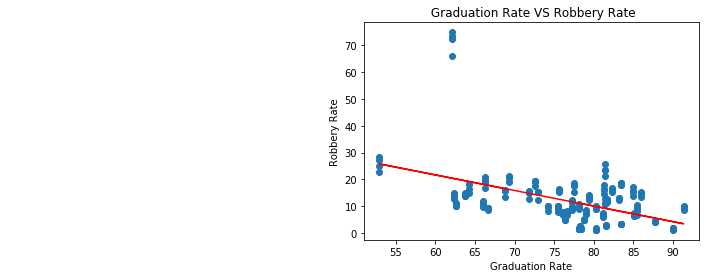

Correlation: -0.44


In [83]:
#Grad Rates vs Robbery Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['robbery rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Robbery Rate")
plt.title(" Graduation Rate VS Robbery Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-4],2)))

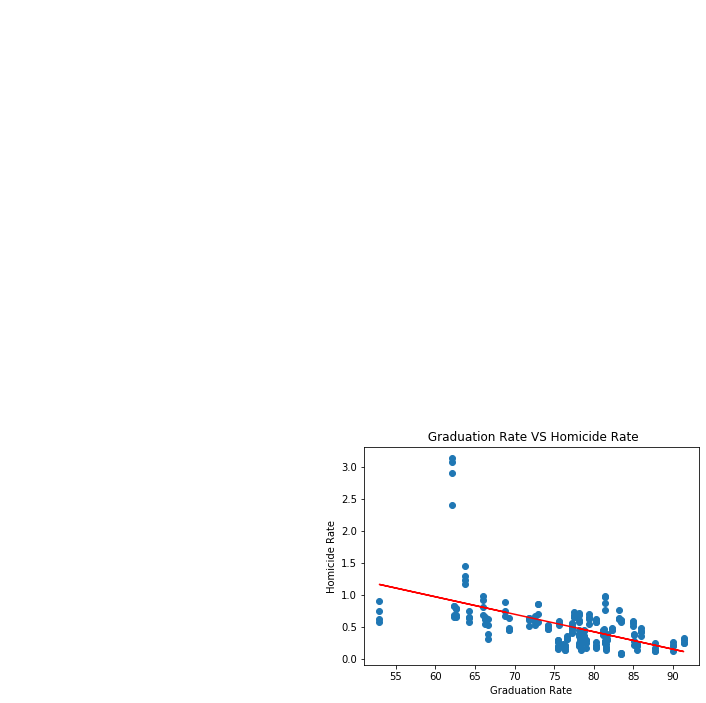

Correlation: -0.52


In [84]:
#Grad Rates vs Homicide Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['homicide rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Homicide Rate")
plt.title(" Graduation Rate VS Homicide Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-3],2)))

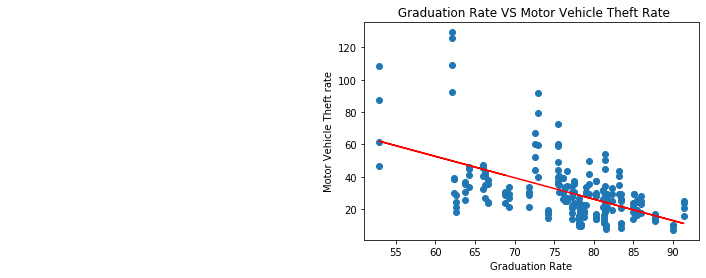

Correlation: -0.54


In [85]:
#Grad Rates vs Motor Vehicle Theft Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['motor_vehicle_theft rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Motor Vehicle Theft rate")
plt.title(" Graduation Rate VS Motor Vehicle Theft Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-2],2)))

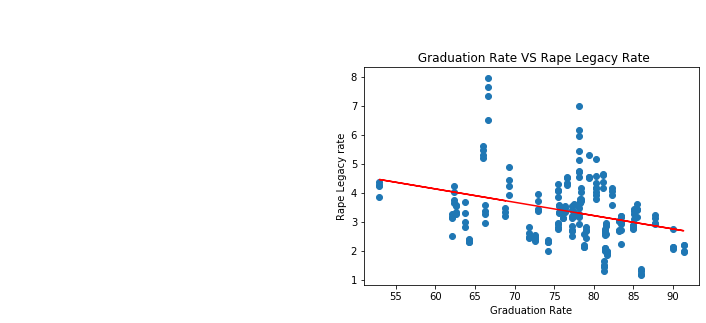

Correlation: -0.32


In [86]:
#Grad Rates vs Rape Legacy Rates
x_values = CrimevsGrad['AFGR']
y_values = CrimevsGrad['rape_legacy rate']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Graduation Rate')
plt.ylabel("Rape Legacy rate")
plt.title(" Graduation Rate VS Rape Legacy Rate")
plt.show()

#Correlation 
print("Correlation: "+ str(round(correlation["AFGR"][-1],2)))